<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [2]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
# matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [4]:
# 데이터 읽어오기

path = 'https://bit.ly/ApartFile'
apt = pd.read_csv(path, encoding='CP949')


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [5]:
# 상위 5개 행 확인
print(apt.head(5))

  지역1  지역2  2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  2021-02  \
0  서울  종로구  1029542  1033625  1036486  1036681  1037986  1039903  1041444   
1  서울   중구   802257   806143   807771   808743   809900   812157   814614   
2  서울  용산구  1399354  1406439  1411232  1412659  1413768  1416951  1421012   
3  서울  성동구   910716   916402   918667   920020   921108   923402   927029   
4  서울  광진구  1021037  1025866  1029256  1030878  1032220  1034524  1038378   

   2021-03  2021-04  2021-05  2021-06  2021-07  
0  1044347  1045819  1047819  1048722  1050750  
1   820100   822257   823314   824371   829486  
2  1427366  1430780  1434768  1439390  1445073  
3   934049   938029   940000   942235   947157  
4  1047439  1053024  1056524  1059476  1063805  


In [6]:
# 하위 5개 행 확인
print(apt.tail(5))

    지역1   지역2  2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  2021-02  \
182  경남   밀양시   126455   126261   125989   125727   125773   125625   125977   
183  경남   거제시   155274   155921   156366   156543   156165   155616   156555   
184  경남   양산시   172574   172582   172828   173383   174672   181445   187973   
185  제주   제주시   303871   303757   303757   303800   303771   304414   306314   
186  제주  서귀포시   223087   222696   222196   221685   221457   221500   222043   

     2021-03  2021-04  2021-05  2021-06  2021-07  
182   126977   127614   127932   128364   129125  
183   157811   159494   160220   160549   161079  
184   191410   194660   197867   201191   204215  
185   308871   310943   313814   324614   344400  
186   222913   223370   224065   224913   231457  


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [7]:
# 열 정보 확인
print(apt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB
None


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [8]:
# 결측치 확인
print(apt.isna().sum())

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64


## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [9]:
# 열 이름 변경
apt.rename(columns={'지역1':'시도'},inplace=True)

apt.rename(columns={'지역2':'구군'},inplace=True)
# 확인


In [10]:
print(apt.head(5))

   시도   구군  2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  2021-02  \
0  서울  종로구  1029542  1033625  1036486  1036681  1037986  1039903  1041444   
1  서울   중구   802257   806143   807771   808743   809900   812157   814614   
2  서울  용산구  1399354  1406439  1411232  1412659  1413768  1416951  1421012   
3  서울  성동구   910716   916402   918667   920020   921108   923402   927029   
4  서울  광진구  1021037  1025866  1029256  1030878  1032220  1034524  1038378   

   2021-03  2021-04  2021-05  2021-06  2021-07  
0  1044347  1045819  1047819  1048722  1050750  
1   820100   822257   823314   824371   829486  
2  1427366  1430780  1434768  1439390  1445073  
3   934049   938029   940000   942235   947157  
4  1047439  1053024  1056524  1059476  1063805  


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [11]:
# 연간 증가액
apt['증가액'] = apt['2021-07']-apt['2020-08']
apt['증가율'] = (apt['증가액'])*100/apt['2020-08']
# 연간 증가율


# 확인
print(apt[['2020-08','2021-07','증가액','증가율']])

     2020-08  2021-07    증가액        증가율
0    1029542  1050750  21208   2.059945
1     802257   829486  27229   3.394050
2    1399354  1445073  45719   3.267150
3     910716   947157  36441   4.001357
4    1021037  1063805  42768   4.188683
..       ...      ...    ...        ...
182   126455   129125   2670   2.111423
183   155274   161079   5805   3.738552
184   172574   204215  31641  18.334743
185   303871   344400  40529  13.337568
186   223087   231457   8370   3.751899

[187 rows x 4 columns]


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [12]:
# 분석 대상 열 지정
apt2 = apt[['시도','구군','증가액','증가율']]

# 확인
print(apt2)

     시도    구군    증가액        증가율
0    서울   종로구  21208   2.059945
1    서울    중구  27229   3.394050
2    서울   용산구  45719   3.267150
3    서울   성동구  36441   4.001357
4    서울   광진구  42768   4.188683
..   ..   ...    ...        ...
182  경남   밀양시   2670   2.111423
183  경남   거제시   5805   3.738552
184  경남   양산시  31641  18.334743
185  제주   제주시  40529  13.337568
186  제주  서귀포시   8370   3.751899

[187 rows x 4 columns]


In [13]:
print(apt2[['구군','증가액']].head(5))

    구군    증가액
0  종로구  21208
1   중구  27229
2  용산구  45719
3  성동구  36441
4  광진구  42768


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

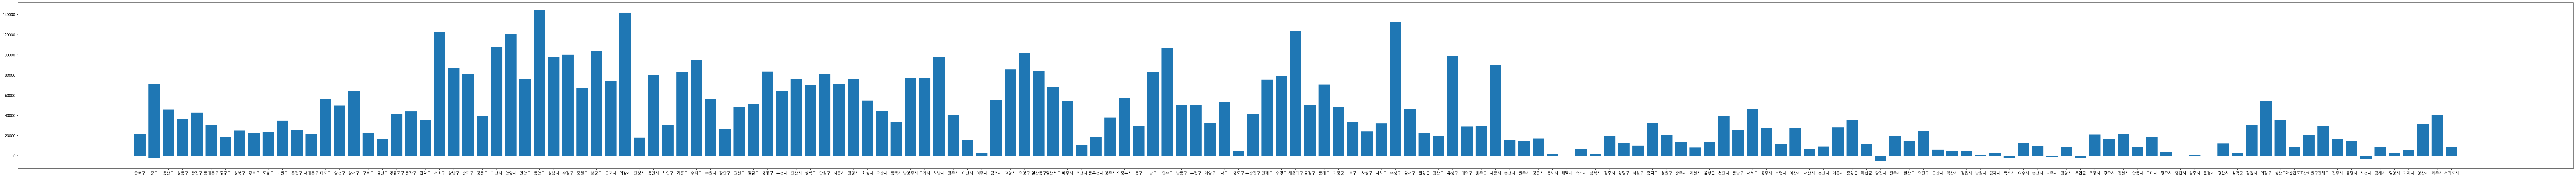

In [14]:
# 차트 그리기
plt.figure(figsize=(120,8))
plt.bar(apt2['구군'],apt2['증가액'])
plt.show()



**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [15]:
# 가격 변동 TOP 25
tmp = apt
tmp.sort_values(by='증가액',ascending=False, inplace=True)
tmp = tmp[['구군','증가액']].head(25)
# tmp.reset_index(drop=True, inplace=True)
# 확인
print(tmp)

       구군     증가액
28    동안구  144265
34    의왕시  141787
99    수성구  132345
86   해운대구  123977
21    서초구  122376
26    안양시  120878
25    과천시  108063
73    연수구  107033
32    분당구  104115
62    덕양구  101934
30    수정구  100357
110   유성구   99153
29    성남시   97866
56    하남시   97673
39    수지구   95127
117   세종시   90169
22    강남구   87274
61    고양시   85520
63   일산동구   83863
44    영통구   83472
38    기흥구   83123
83     남구   82844
23    송파구   81143
48    단원구   81010
36    용인시   79811


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

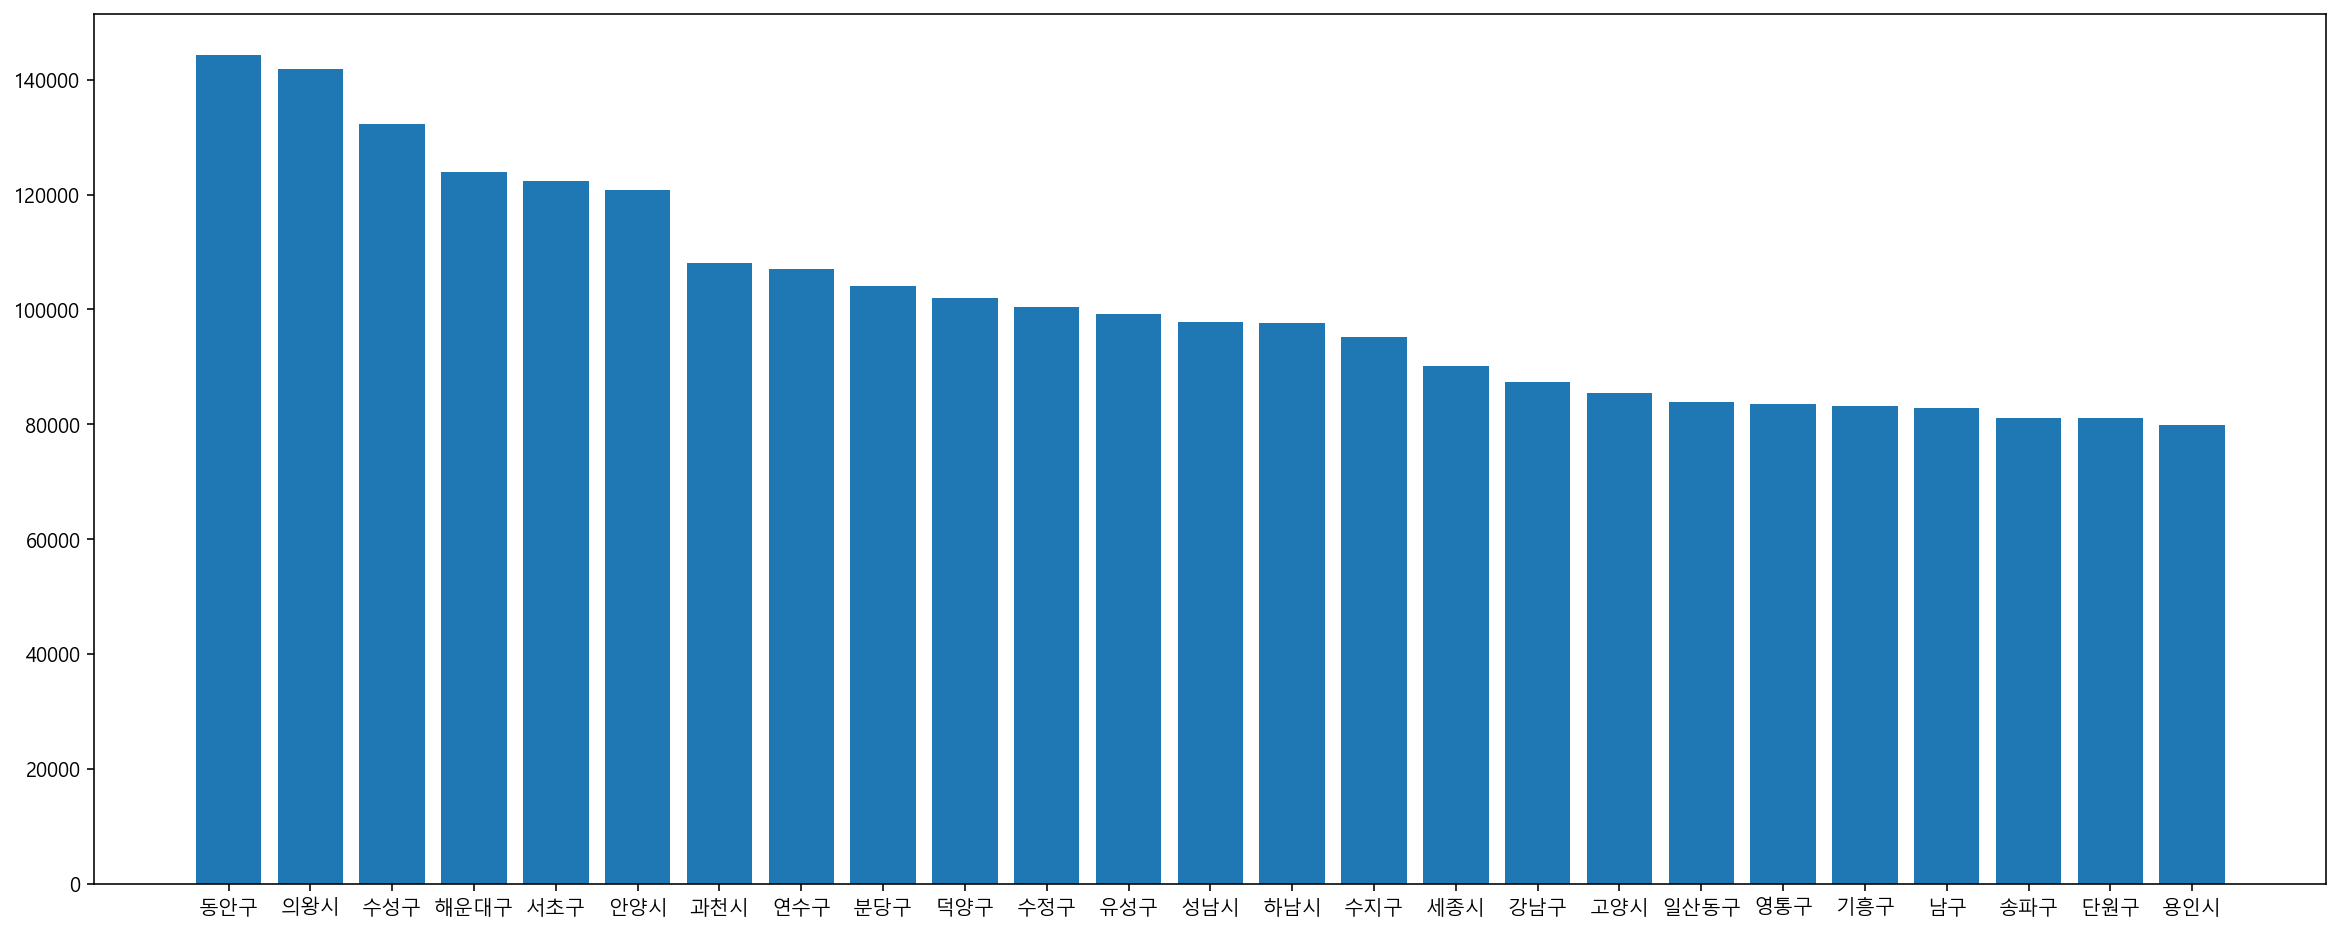

In [16]:
# 차트 그리기
plt.figure(figsize=(20,8))
plt.bar(tmp['구군'],tmp['증가액'])
plt.show()



**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [17]:
# 가격 변동 BOTTOM 25
tmp2 = apt
tmp2.sort_values(by='증가액',ascending=True, inplace=True)
tmp2 = tmp2[['구군','증가액']].head(25)
# tmp.reset_index(drop=True, inplace=True)
# 확인
print(tmp2)

# 확인


      구군   증가액
144  당진시 -5264
180  사천시 -3527
78    중구 -2645
158  무안군 -2588
153  목포시 -2396
156  나주시 -1188
169  문경시  -550
167  영천시   -93
122  태백시   -42
151  남원시   486
168  상주시   677
121  동해시  1334
124  삼척시  1472
152  김제시  2487
171  칠곡군  2620
182  밀양시  2670
59   여주시  2808
166  영주시  3444
81   영도구  4625
150  정읍시  4740
149  익산시  4821
183  거제시  5805
148  군산시  6152
123  속초시  6652
139  서산시  7133


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

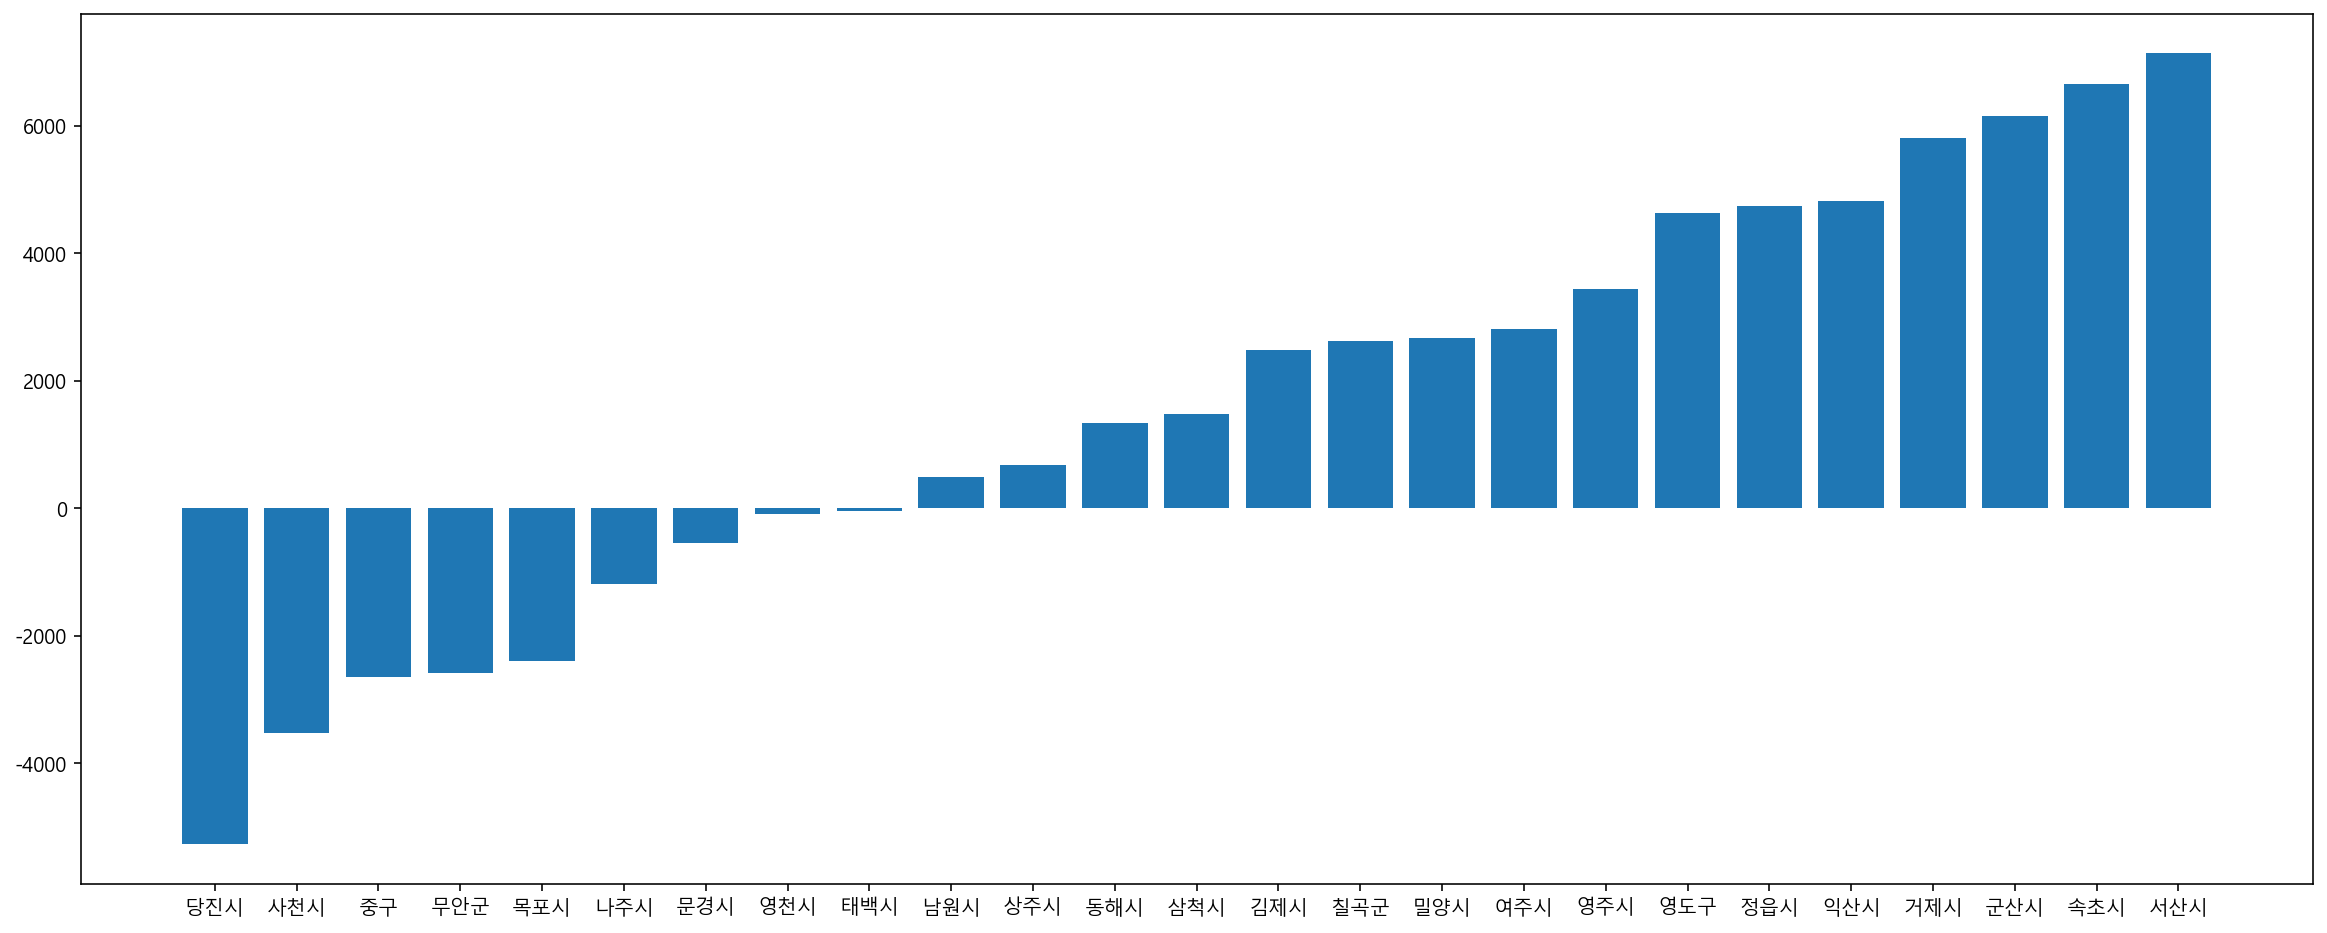

In [18]:
# 차트 그리기

plt.figure(figsize=(20,8))
plt.bar(tmp2['구군'],tmp2['증가액'])
plt.show()



### 4.2.ㅇㅇ 지역 분석

**1) ㅇㅇ 지역 데이터 추출**

- apart2 데이터프레임에서 ㅇㅇ지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [20]:
# 데이터프레임 만들기
# print(apt2)
apt2 = apt2[apt2['시도']=='서울']

# 확인
print(apt2)

    시도    구군     증가액       증가율
0   서울   종로구   21208  2.059945
1   서울    중구   27229  3.394050
2   서울   용산구   45719  3.267150
3   서울   성동구   36441  4.001357
4   서울   광진구   42768  4.188683
5   서울  동대문구   30217  4.539275
6   서울   중랑구   18255  3.984051
7   서울   성북구   25009  4.186356
8   서울   강북구   22278  4.380527
9   서울   도봉구   23500  5.434091
10  서울   노원구   34828  7.254534
11  서울   은평구   25224  4.133144
12  서울  서대문구   21630  3.322468
13  서울   마포구   55788  5.584597
14  서울   양천구   49836  5.632141
15  서울   강서구   25659  4.114017
16  서울   구로구   22991  4.033388
17  서울   금천구   16641  3.188401
18  서울  영등포구   41415  5.079850
19  서울   동작구   43885  5.195680
20  서울   관악구   35652  6.814272
21  서울   서초구  122376  6.988865
22  서울   강남구   87274  5.040291
23  서울   송파구   81143  6.435640
24  서울   강동구   39687  4.984871


**2) ㅇㅇ 지역 가격 변동 현황**

- ㅇㅇ 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

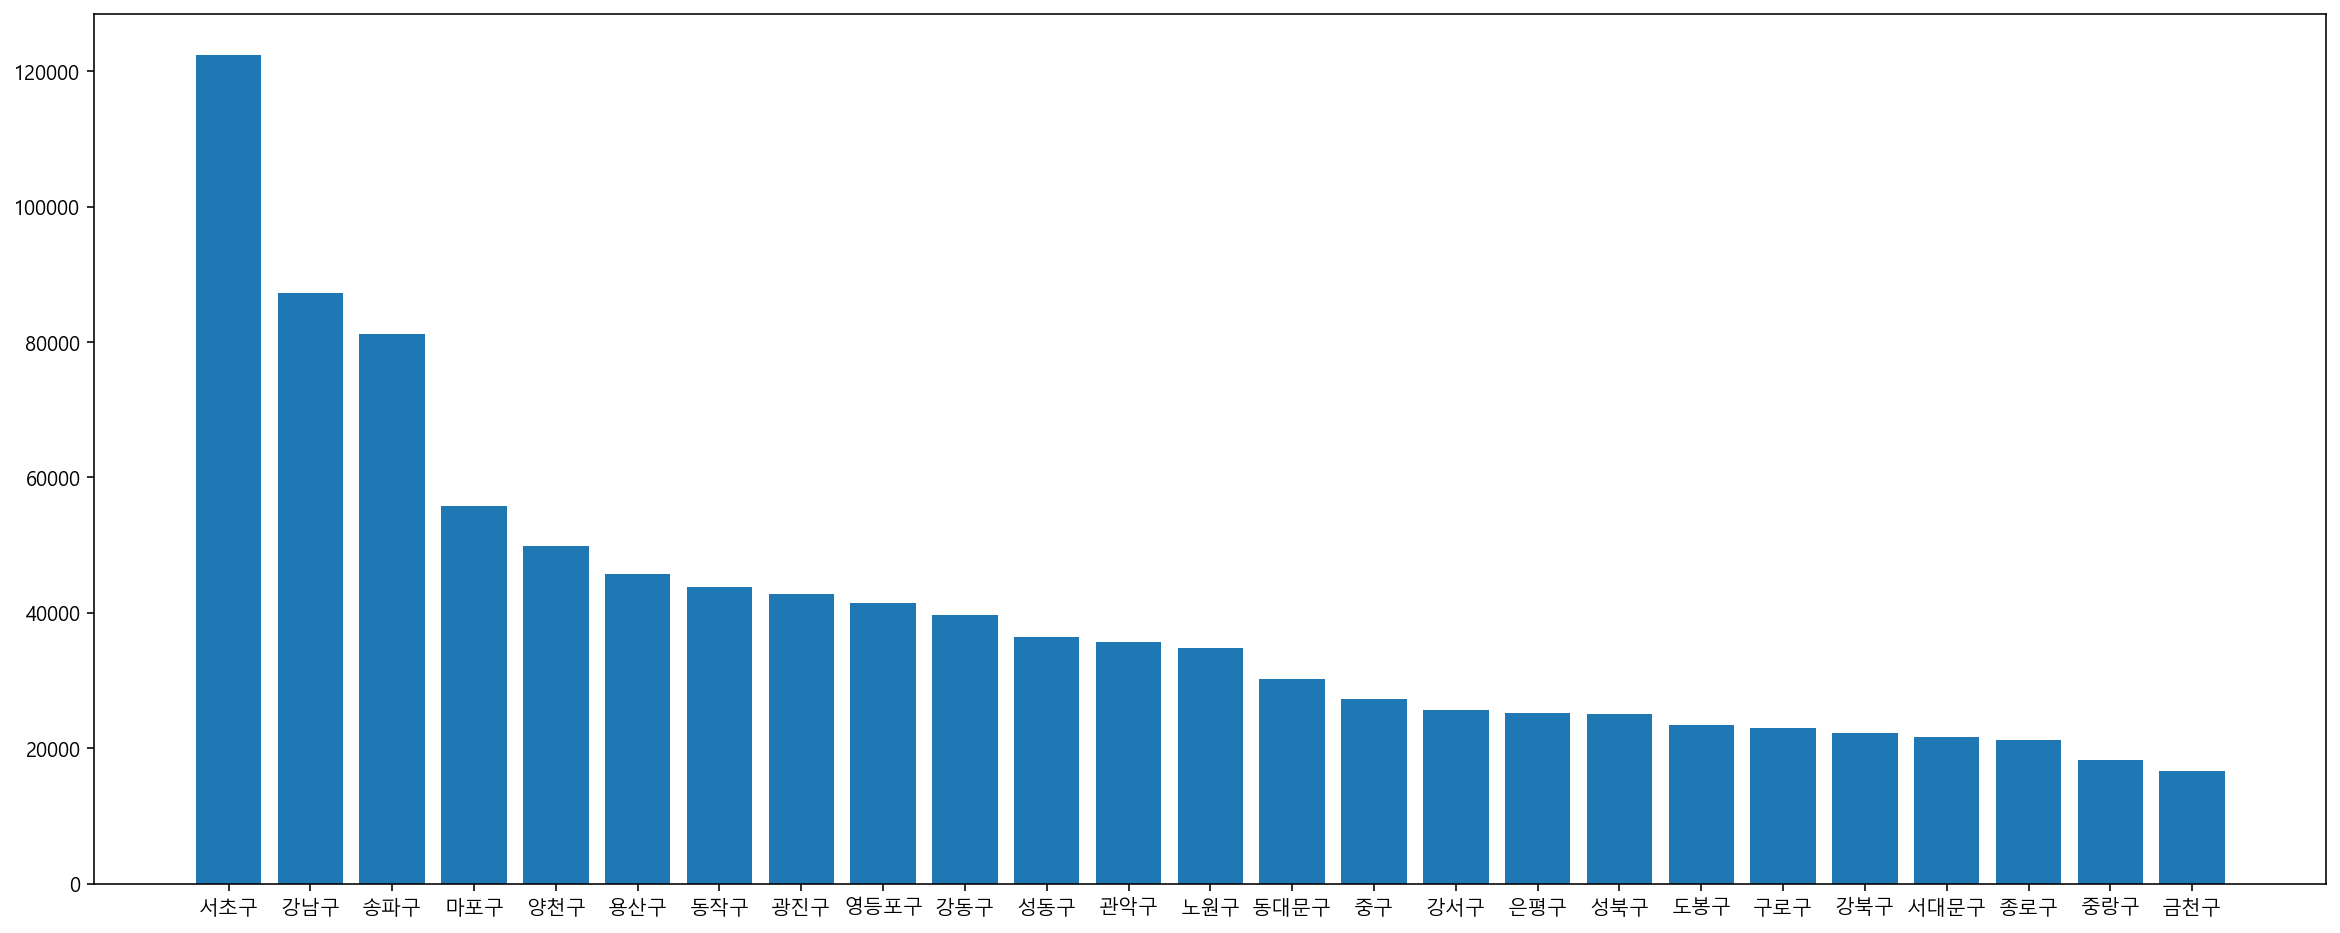

In [147]:
# ㅇㅇ 지역 가격 변동
plt.figure(figsize=(20,8))
plt.bar(apt2['구군'],apt2['증가액'])
plt.show()



**3) ㅇㅇ 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

       구군     증가액
4     서초구  122376
16    강남구   87274
22    송파구   81143
45    마포구   55788
56    양천구   49836
61    용산구   45719
63    동작구   43885
64    광진구   42768
65   영등포구   41415
70    강동구   39687
73    성동구   36441
74    관악구   35652
78    노원구   34828
88   동대문구   30217
101    중구   27229
103   강서구   25659
104   은평구   25224
106   성북구   25009
110   도봉구   23500
111   구로구   22991
115   강북구   22278
117  서대문구   21630
118   종로구   21208
130   중랑구   18255
135   금천구   16641


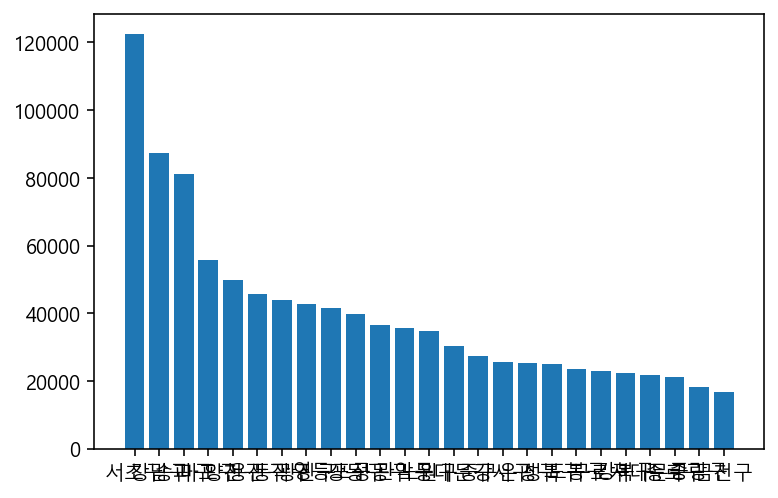

In [146]:
# ㅇㅇ 지역 가격 변동 순위

apt2.sort_values(by='증가액',ascending=False, inplace=True)
apt2 = apt2[['구군','증가액']]
# tmp.reset_index(drop=True, inplace=True)
# 확인
print(apt2)
# 시각화
plt.bar(apt2['구군'],apt2['증가액'])
plt.show()




## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 대부분의 지역 집값은 오르고있다. 내집 마련은 힘들다.
- 대도시는 다 오르고 진짜 시골들이 내려가는듯.
-  
-  

**2) 기타**

- 통계상 내년에도 비싸질텐데 내 집 마련 어떻게하지
- 
- 
- 
- 
